In [22]:
import get_processed_data as gpd
import scipy.stats as stats
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt


# Malte

## Calculate means

In [23]:
# Load data
malte_easy = gpd.get_processed_data('malte', ["3", "4", "5", "5-"])
malte_hard = gpd.get_processed_data('malte', ["6", "6+", "7"])


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [24]:
# Acceleration X, Y, Z mean
malte_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_easy]
malte_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_easy]
malte_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_easy]

malte_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in malte_hard]
malte_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in malte_hard]
malte_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in malte_hard]

# Rotation X, Y, Z mean
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]

malte_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_easy_rot]
malte_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_easy_rot]

malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

malte_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in malte_hard_rot]
malte_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in malte_hard_rot]

Calculate acceleration magnitude means

In [25]:
# Calculate acceleration magnitudes
malte_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_easy]
malte_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in malte_hard]

# Calculate acceleration magnitude means
malte_easy_acc_mag_means = [x.mean() for x in malte_easy_acc_mag]
malte_hard_acc_mag_means = [x.mean() for x in malte_hard_acc_mag]

Calculate angular velocity means

In [26]:
# Get rotation matrices
malte_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_easy]
malte_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in malte_hard]

# Calculate rotation differences for each sample
malte_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_easy_rot]
malte_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in malte_hard_rot]

# Convert to rotation vectors
malte_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_easy_rot_diff]
malte_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in malte_hard_rot_diff]

# Calculate magnitude of rotation vectors
malte_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_easy_rot_diff_vec]
malte_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in malte_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
malte_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_easy_rot_diff_vec_mag]
malte_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in malte_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

In [27]:
alpha = 0.05
features = ["malte_easy_acc_x_mean", "malte_hard_acc_x_mean", "malte_easy_acc_y_mean", "malte_hard_acc_y_mean", "malte_easy_acc_z_mean", "malte_hard_acc_z_mean", "malte_easy_rot_x_mean", "malte_hard_rot_x_mean", "malte_easy_rot_y_mean", "malte_hard_rot_y_mean", "malte_easy_rot_z_mean", "malte_hard_rot_z_mean", "malte_easy_acc_mag_means", "malte_hard_acc_mag_means", "malte_easy_rot_diff_vec_mag_mean", "malte_hard_rot_diff_vec_mag_mean"]


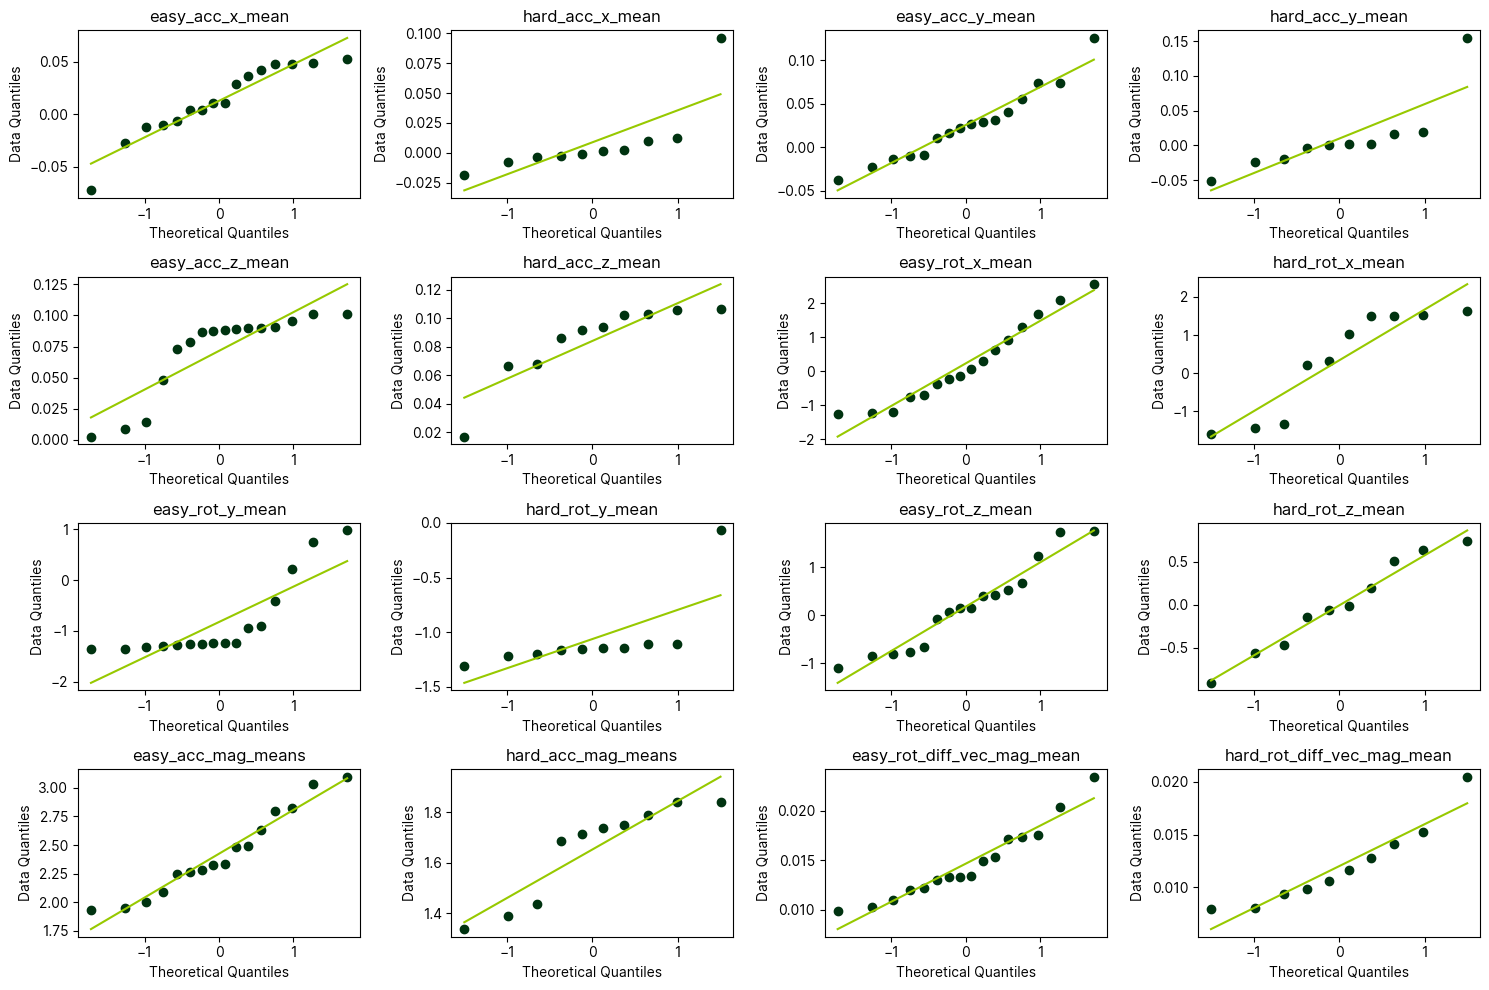

In [48]:
# Determine the number of rows and columns for the grid
n_features = len(features)
n_cols = 4  # You can adjust the number of columns here
n_rows = int(np.ceil(n_features / n_cols))

plt.rc('font', family='Inter')
light_col = "#C7EF4E"
dark_col = "#085420"

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

for idx, feature_name in enumerate(features):
    feature = eval(feature_name)
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    
    stats.probplot(feature, dist="norm", plot=ax)

    # make dots black
    # ax.get_lines()[0].set_marker('p')
    ax.get_lines()[0].set_markerfacecolor("#003310")
    ax.get_lines()[0].set_markeredgecolor("#003310")

    ax.get_lines()[1].set_color('#97C900')

    ax.set_title(feature_name.replace("malte_", ""))
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Data Quantiles")

# Remove any empty subplots
for i in range(n_features, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.savefig("exports/qq_plots_malte.png", dpi=300)

In [ ]:
for feature_name in features:
    feature = eval(feature_name)
    shapiro_test = stats.shapiro(feature)
    print(feature_name)
    print(shapiro_test)
    print("Normally distributed: ", shapiro_test[1] > alpha)
    print("")

malte_easy_acc_x_mean
ShapiroResult(statistic=0.9072067032129565, pvalue=0.10491463051441946)
Normally distributed:  True

malte_hard_acc_x_mean
ShapiroResult(statistic=0.6344969462386008, pvalue=0.00014296009769459758)
Normally distributed:  False

malte_easy_acc_y_mean
ShapiroResult(statistic=0.9555714863582864, pvalue=0.5826981808793938)
Normally distributed:  True

malte_hard_acc_y_mean
ShapiroResult(statistic=0.7278136605161125, pvalue=0.001916603538121324)
Normally distributed:  False

malte_easy_acc_z_mean
ShapiroResult(statistic=0.7454984174373932, pvalue=0.0005610101561132059)
Normally distributed:  False

malte_hard_acc_z_mean
ShapiroResult(statistic=0.7897152108858652, pvalue=0.010870315559625655)
Normally distributed:  False

malte_easy_rot_x_mean
ShapiroResult(statistic=0.9390866124107056, pvalue=0.33797608552955005)
Normally distributed:  True

malte_hard_rot_x_mean
ShapiroResult(statistic=0.8182811958595867, pvalue=0.024157472699860065)
Normally distributed:  False

malt

In [ ]:
# For features that are normally distributed, we can use a t-test. For features that are not normally distributed, we can use a Mann-Whitney U test.

# Acceleration X, Y, Z mean – Mann-Whitney U test

acc_x_mean_test = stats.mannwhitneyu(malte_easy_acc_x_mean, malte_hard_acc_x_mean)
acc_y_mean_test = stats.mannwhitneyu(malte_easy_acc_y_mean, malte_hard_acc_y_mean)
acc_z_mean_test = stats.mannwhitneyu(malte_easy_acc_z_mean, malte_hard_acc_z_mean)

print("Acceleration X mean test: ", acc_x_mean_test)
print("Acceleration Y mean test: ", acc_y_mean_test)
print("Acceleration Z mean test: ", acc_z_mean_test)

# Rotation X, Z mean – t-test; Rotation Y mean – Mann-Whitney U test

rot_x_mean_test = stats.ttest_ind(malte_easy_rot_x_mean, malte_hard_rot_x_mean)
rot_y_mean_test = stats.mannwhitneyu(malte_easy_rot_y_mean, malte_hard_rot_y_mean)
rot_z_mean_test = stats.ttest_ind(malte_easy_rot_z_mean, malte_hard_rot_z_mean)

print("Rotation X mean test: ", rot_x_mean_test)
print("Rotation Y mean test: ", rot_y_mean_test)
print("Rotation Z mean test: ", rot_z_mean_test)

# Acceleration magnitude mean – Mann-Whitney U test

acc_mag_mean_test = stats.mannwhitneyu(malte_easy_acc_mag_means, malte_hard_acc_mag_means)
print("Acceleration magnitude mean test: ", acc_mag_mean_test)

# Rotation vector magnitude mean – t-test

rot_diff_vec_mag_mean_test = stats.ttest_ind(malte_easy_rot_diff_vec_mag_mean, malte_hard_rot_diff_vec_mag_mean)
print("Rotation vector magnitude mean test: ", rot_diff_vec_mag_mean_test)

Acceleration X mean test:  MannwhitneyuResult(statistic=97.0, pvalue=0.3845046293802694)
Acceleration Y mean test:  MannwhitneyuResult(statistic=107.0, pvalue=0.16251203737781206)
Acceleration Z mean test:  MannwhitneyuResult(statistic=52.0, pvalue=0.14723225536366547)
Rotation X mean test:  TtestResult(statistic=-0.216937485525085, pvalue=0.830090631285856, df=24.0)
Rotation Y mean test:  MannwhitneyuResult(statistic=64.0, pvalue=0.41397315940843393)
Rotation Z mean test:  TtestResult(statistic=0.5977828401858231, pvalue=0.5555840998691837, df=24.0)
Acceleration magnitude mean test:  MannwhitneyuResult(statistic=160.0, pvalue=2.789324500423493e-05)
Rotation vector magnitude mean test:  TtestResult(statistic=1.738724712529789, pvalue=0.09489745851555645, df=24.0)


In [ ]:
# Calculate power of the tests
from statsmodels.stats.power import TTestIndPower
effect_size = 0.5  # specify the standardized effect size
alpha = 0.05  # significance level
nobs1 = 16  # sample size of group 1
nobs2 = 10  # sample size of group 2

# Calculate the power
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=nobs1, alpha=alpha, ratio=nobs2/nobs1, alternative='two-sided')

print(f"Power of t-test: {power:.4f}")

Power of t-test: 0.2218


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# Define a function to simulate Mann-Whitney U test with resampling
def simulate_mwu_power(group1, group2, effect_size, mwu_result, n_simulations=10000):
    n1, n2 = len(group1), len(group2)
    u_statistics = []
    for _ in range(n_simulations):
        combined_data = np.concatenate([group1, group2])
        np.random.shuffle(combined_data)
        u, _ = mannwhitneyu(combined_data[:n1], combined_data[n1:])
        u_statistics.append(u)
    power = np.mean([1 if u >= mwu_result.statistic else 0 for u in u_statistics])
    return power

def solve_power(group1, group2):
    mwu_result = mannwhitneyu(group1, group2)
    effect_size = mwu_result.statistic / (len(group1) * len(group2))
    power = simulate_mwu_power(group1, group2, effect_size, mwu_result)
    print(f"Power of Mann-Whitney U test: {power:.3f}") 


solve_power(malte_easy_acc_x_mean, malte_hard_acc_x_mean)
solve_power(malte_easy_acc_y_mean, malte_hard_acc_y_mean)
solve_power(malte_easy_acc_z_mean, malte_hard_acc_z_mean)
solve_power(malte_easy_rot_y_mean, malte_hard_rot_y_mean)
solve_power(malte_easy_acc_mag_means, malte_hard_acc_mag_means)


Power of Mann-Whitney U test: 0.201
Power of Mann-Whitney U test: 0.085
Power of Mann-Whitney U test: 0.932
Power of Mann-Whitney U test: 0.799
Power of Mann-Whitney U test: 0.000


# Luis

## Calculate means

In [ ]:
# Load data
luis_easy = gpd.get_processed_data('luis', ["3", "4"])
luis_hard = gpd.get_processed_data('luis', ["5", "5-", "6", "6+"])


Calculate means for acceleration X,Y,Z and rotation X,Y,Z independently

In [ ]:
# Acceleration X, Y, Z mean
luis_easy_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_easy]
luis_easy_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_easy]
luis_easy_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_easy]

luis_hard_acc_x_mean = [sample["FreeAcc_X"].mean() for sample in luis_hard]
luis_hard_acc_y_mean = [sample["FreeAcc_Y"].mean() for sample in luis_hard]
luis_hard_acc_z_mean = [sample["FreeAcc_Z"].mean() for sample in luis_hard]

# Rotation X, Y, Z mean
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]

luis_easy_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_easy_rot]
luis_easy_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_easy_rot]

luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

luis_hard_rot_x_mean = [np.mean([x.as_euler("xyz")[0] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_y_mean = [np.mean([x.as_euler("xyz")[1] for x in sample]) for sample in luis_hard_rot]
luis_hard_rot_z_mean = [np.mean([x.as_euler("xyz")[2] for x in sample]) for sample in luis_hard_rot]

Calculate acceleration magnitude means

In [ ]:
# Calculate acceleration magnitudes
luis_easy_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_easy]
luis_hard_acc_mag = [(sample["FreeAcc_X"]**2 + sample["FreeAcc_Y"]**2 + sample["FreeAcc_Z"]**2)**0.5 for sample in luis_hard]

# Calculate acceleration magnitude means
luis_easy_acc_mag_means = [x.mean() for x in luis_easy_acc_mag]
luis_hard_acc_mag_means = [x.mean() for x in luis_hard_acc_mag]

Calculate angular velocity means

In [ ]:
# Get rotation matrices
luis_easy_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_easy]
luis_hard_rot = [[R.from_quat([x["Quat_X"], x["Quat_Y"], x["Quat_Z"], x["Quat_W"]]) for x in sample] for sample in luis_hard]

# Calculate rotation differences for each sample
luis_easy_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_easy_rot]
luis_hard_rot_diff = [[sample[i+1].inv() * sample[i] for i in range(len(sample)-1)] for sample in luis_hard_rot]

# Convert to rotation vectors
luis_easy_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_easy_rot_diff]
luis_hard_rot_diff_vec = [[x.as_rotvec() for x in sample] for sample in luis_hard_rot_diff]

# Calculate magnitude of rotation vectors
luis_easy_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_easy_rot_diff_vec]
luis_hard_rot_diff_vec_mag = [[np.linalg.norm(x) for x in sample] for sample in luis_hard_rot_diff_vec]

# Calculate mean of rotation vector magnitudes
luis_easy_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_easy_rot_diff_vec_mag]
luis_hard_rot_diff_vec_mag_mean = [np.mean(x) for x in luis_hard_rot_diff_vec_mag]


## Q-Q plots & Shapiro-Wilk test for normality with alpha = 0.05

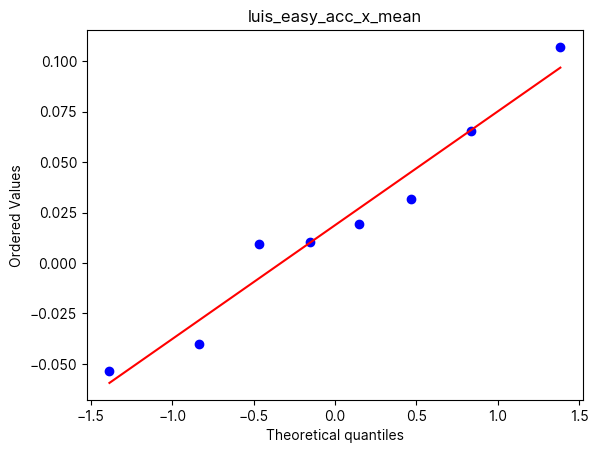

ShapiroResult(statistic=0.9578878267149757, pvalue=0.7897564292410056)
Is normally distributed:  True


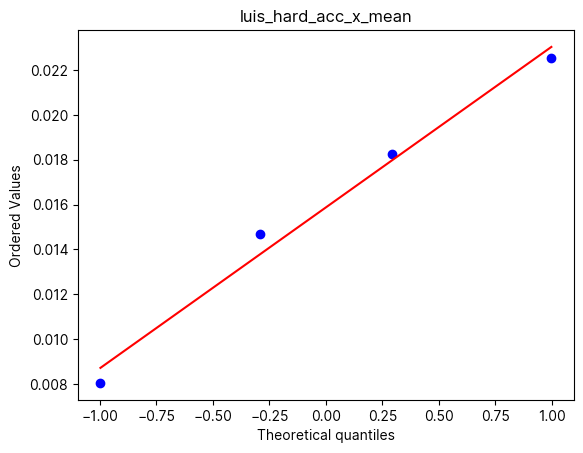

ShapiroResult(statistic=0.9879344302167545, pvalue=0.9466635712408666)
Is normally distributed:  True


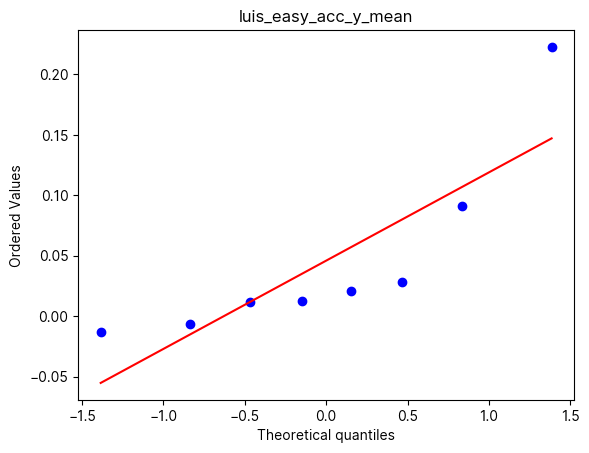

ShapiroResult(statistic=0.7324947078204339, pvalue=0.005220543284986885)
Is normally distributed:  False


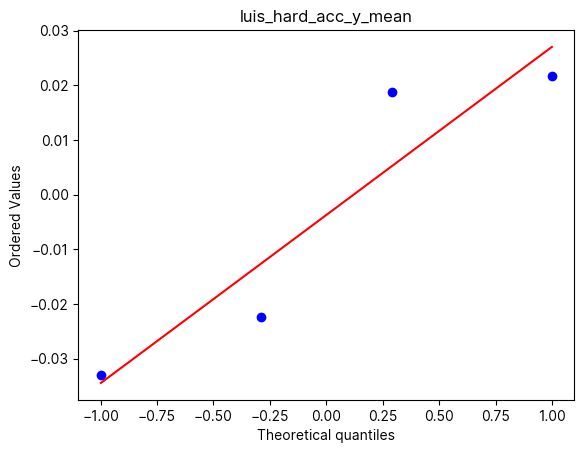

ShapiroResult(statistic=0.8367963308493351, pvalue=0.18622423332403648)
Is normally distributed:  True


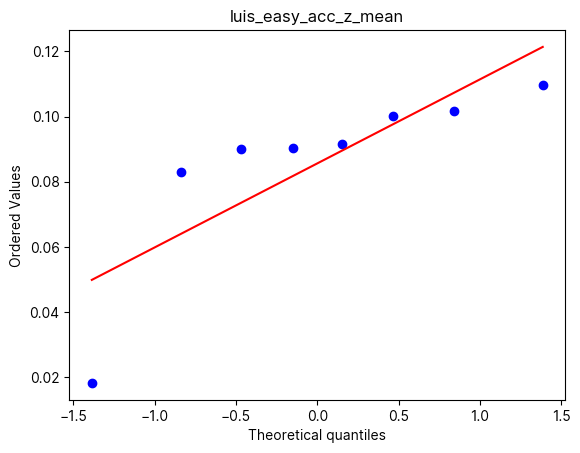

ShapiroResult(statistic=0.7037075191155395, pvalue=0.0024806480538642974)
Is normally distributed:  False


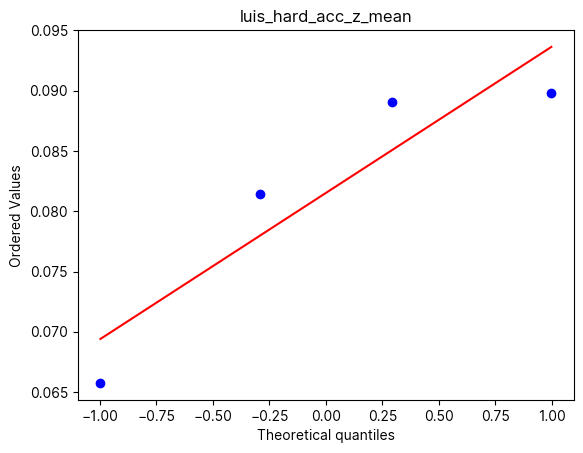

ShapiroResult(statistic=0.8470550327832578, pvalue=0.21676538818478977)
Is normally distributed:  True


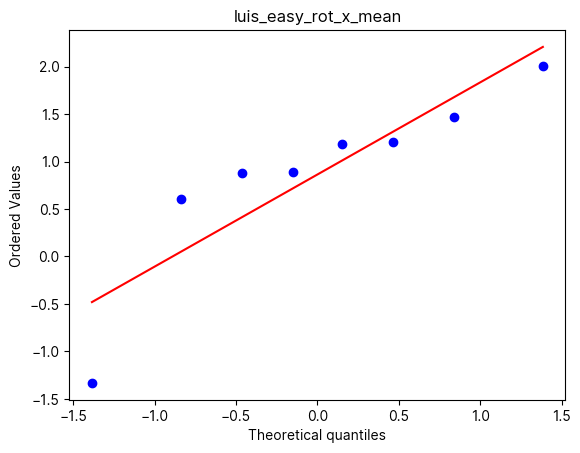

ShapiroResult(statistic=0.8269024986612322, pvalue=0.05511615892643038)
Is normally distributed:  True


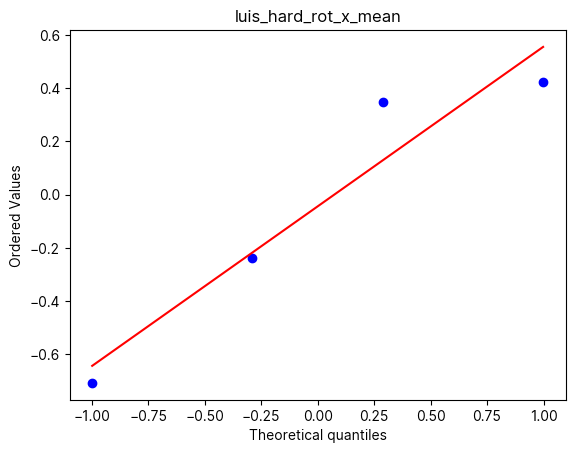

ShapiroResult(statistic=0.8996149936760574, pvalue=0.42914925176861823)
Is normally distributed:  True


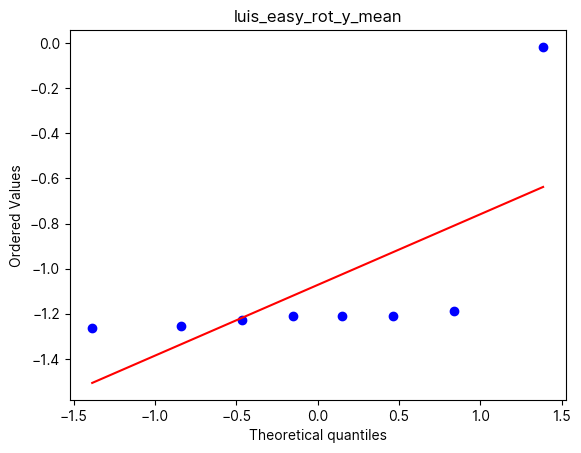

ShapiroResult(statistic=0.4758307704730015, pvalue=5.274456588581049e-06)
Is normally distributed:  False


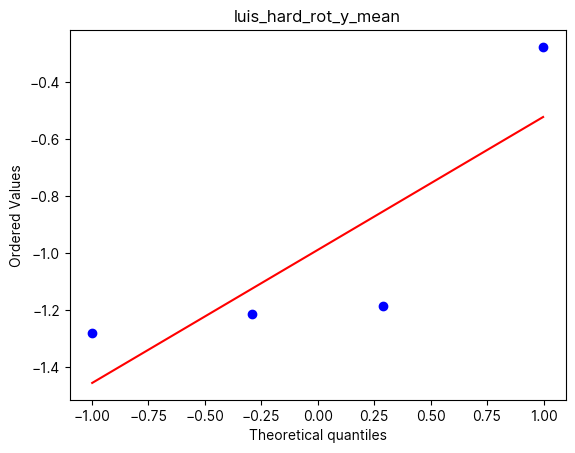

ShapiroResult(statistic=0.7084477631825931, pvalue=0.01449785793368876)
Is normally distributed:  False


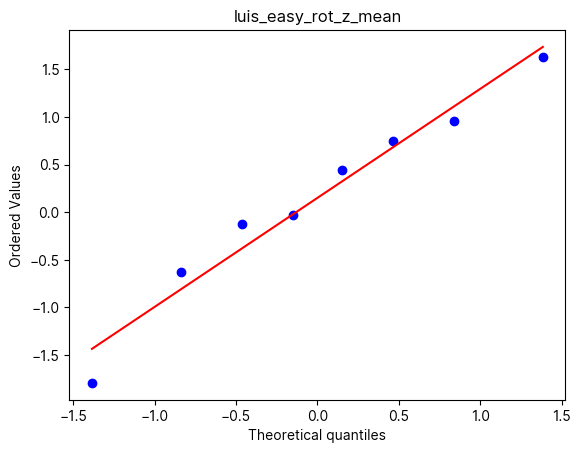

ShapiroResult(statistic=0.9742306296571376, pvalue=0.9289803623654889)
Is normally distributed:  True


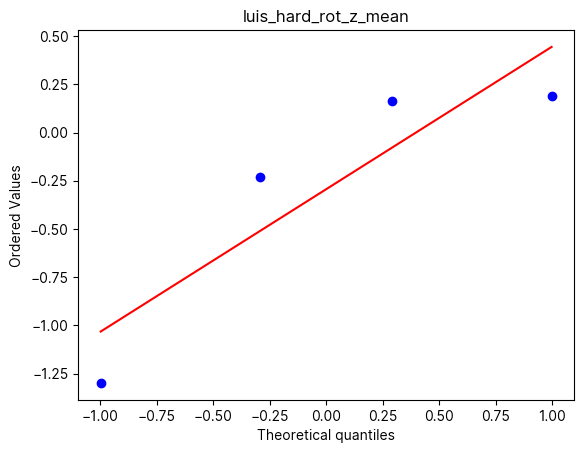

ShapiroResult(statistic=0.8125534030302592, pvalue=0.12670583942439195)
Is normally distributed:  True


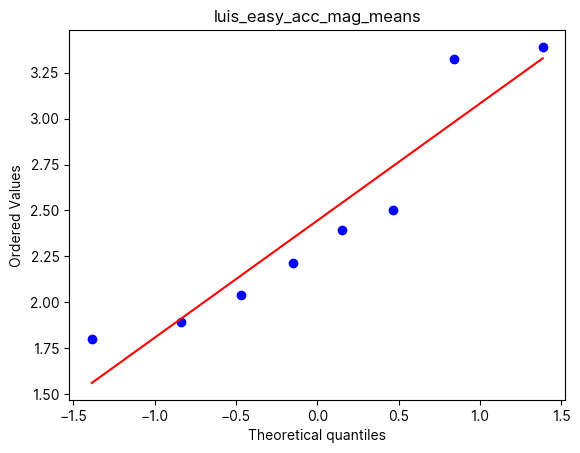

ShapiroResult(statistic=0.8680004465321, pvalue=0.1440808916000749)
Is normally distributed:  True


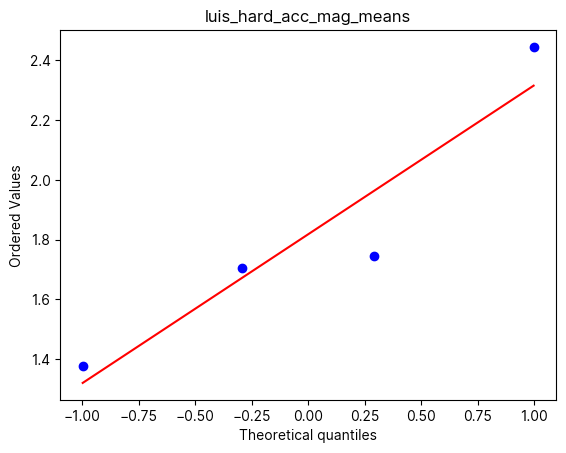

ShapiroResult(statistic=0.9050637388182844, pvalue=0.45664385830772014)
Is normally distributed:  True


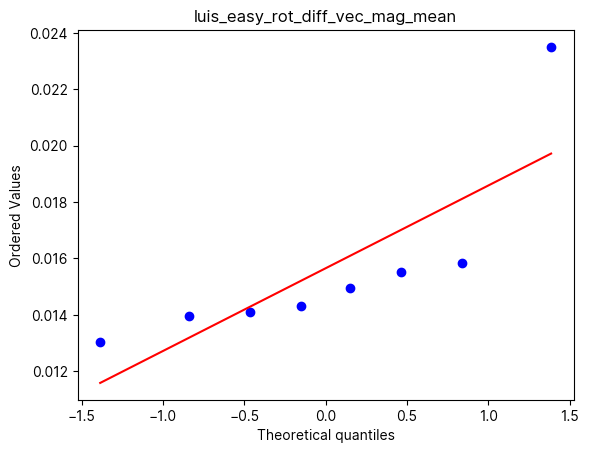

ShapiroResult(statistic=0.6815308575243859, pvalue=0.001390010468421716)
Is normally distributed:  False


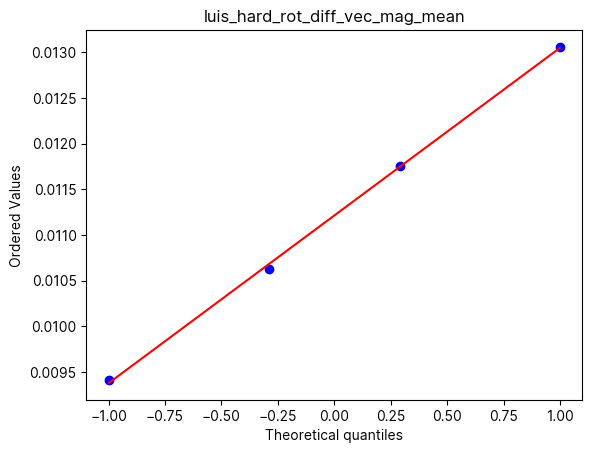

ShapiroResult(statistic=0.9960514677088704, pvalue=0.9859760178299135)
Is normally distributed:  True



Features are normally distributed:
luis_easy_acc_x_mean True
luis_hard_acc_x_mean True
luis_easy_acc_y_mean False
luis_hard_acc_y_mean True
luis_easy_acc_z_mean False
luis_hard_acc_z_mean True
luis_easy_rot_x_mean True
luis_hard_rot_x_mean True
luis_easy_rot_y_mean False
luis_hard_rot_y_mean False
luis_easy_rot_z_mean True
luis_hard_rot_z_mean True
luis_easy_acc_mag_means True
luis_hard_acc_mag_means True
luis_easy_rot_diff_vec_mag_mean False
luis_hard_rot_diff_vec_mag_mean True


In [ ]:
alpha = 0.05
features = ["luis_easy_acc_x_mean", "luis_hard_acc_x_mean", "luis_easy_acc_y_mean", "luis_hard_acc_y_mean", "luis_easy_acc_z_mean", "luis_hard_acc_z_mean", "luis_easy_rot_x_mean", "luis_hard_rot_x_mean", "luis_easy_rot_y_mean", "luis_hard_rot_y_mean", "luis_easy_rot_z_mean", "luis_hard_rot_z_mean", "luis_easy_acc_mag_means", "luis_hard_acc_mag_means", "luis_easy_rot_diff_vec_mag_mean", "luis_hard_rot_diff_vec_mag_mean"]

features_normal_distributed = {}

for feature_name in features:
    feature = eval(feature_name)
    stats.probplot(feature, dist="norm", plot=plt)
    plt.title(feature_name)
    plt.show()

    shapiro_test = stats.shapiro(feature)
    print(shapiro_test)
    print("Is normally distributed: ", shapiro_test[1] > alpha)

    features_normal_distributed[feature_name] = shapiro_test[1] > alpha

print("\n\n")
print("Features are normally distributed:")
for key, value in features_normal_distributed.items():
    print(key, value)


In [ ]:
# Acceleration X, Y, Z mean – t-test

acc_x_mean_test = stats.ttest_ind(luis_easy_acc_x_mean, luis_hard_acc_x_mean)
acc_y_mean_test = stats.ttest_ind(luis_easy_acc_y_mean, luis_hard_acc_y_mean)
acc_z_mean_test = stats.ttest_ind(luis_easy_acc_z_mean, luis_hard_acc_z_mean)

print("Acceleration X mean test: ", acc_x_mean_test)
print("Acceleration Y mean test: ", acc_y_mean_test)
print("Acceleration Z mean test: ", acc_z_mean_test)

# Rotation X, Y, mean – t-test; Rotation Z mean – Mann-Whitney U test

rot_x_mean_test = stats.ttest_ind(luis_easy_rot_x_mean, luis_hard_rot_x_mean)
rot_y_mean_test = stats.ttest_ind(luis_easy_rot_y_mean, luis_hard_rot_y_mean)
rot_z_mean_test = stats.mannwhitneyu(luis_easy_rot_z_mean, luis_hard_rot_z_mean)

print("Rotation X mean test: ", rot_x_mean_test)
print("Rotation Y mean test: ", rot_y_mean_test)
print("Rotation Z mean test: ", rot_z_mean_test)

# Acceleration magnitude mean – t-test

acc_mag_mean_test = stats.ttest_ind(luis_easy_acc_mag_means, luis_hard_acc_mag_means)
print("Acceleration magnitude mean test: ", acc_mag_mean_test)

# Rotation vector magnitude mean – t-test

rot_diff_vec_mag_mean_test = stats.ttest_ind(luis_easy_rot_diff_vec_mag_mean, luis_hard_rot_diff_vec_mag_mean)
print("Rotation vector magnitude mean test: ", rot_diff_vec_mag_mean_test)


Acceleration X mean test:  TtestResult(statistic=0.10488909445351388, pvalue=0.9185378345260362, df=10.0)
Acceleration Y mean test:  TtestResult(statistic=1.2052274543904373, pvalue=0.255861050268773, df=10.0)
Acceleration Z mean test:  TtestResult(statistic=0.2717023608298049, pvalue=0.7913776963153838, df=10.0)
Rotation X mean test:  TtestResult(statistic=1.6965868092409646, pvalue=0.12062843690883125, df=10.0)
Rotation Y mean test:  TtestResult(statistic=-0.3098813905329638, pvalue=0.7630124467715751, df=10.0)
Rotation Z mean test:  MannwhitneyuResult(statistic=21.0, pvalue=0.46060606060606063)
Acceleration magnitude mean test:  TtestResult(statistic=1.8024638166029634, pvalue=0.10164342983953252, df=10.0)
Rotation vector magnitude mean test:  TtestResult(statistic=2.50977143685237, pvalue=0.030924714322483796, df=10.0)
